In [1]:
import numpy as np


def load_maze(uri):
    maze = []
    with open(uri, 'r') as file:
        for line in file:
            line = line.rstrip()
            row = []
            for c in line:
                if c == '_':
                    row.append(0)
                elif c.isdigit():
                    row.append(int(c))
                elif c == 'I':
                    row.append(-1)
                elif c == 'E':
                    row.append(-2)
                else:
                    row.append(1)
            maze.append(row)

    return np.array(maze)


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = 0

def draw_maze(maze):
    global fig
    fig += 1
    plt.figure(fig)
    plt.pcolormesh(maze)
    plt.axes().set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.axes().invert_yaxis()
    plt.show()


In [3]:
def find_start_end(maze):
    start = tuple(np.argwhere(maze == -1)[0])
    end = tuple(np.argwhere(maze == -2)[0])

    return start, end


In [4]:
from heapq import *


def heuristic(a, b):
    return (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2


def astar(array, start, goal):
    
    array[start] = 1
    array[goal] = 1

    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic(start, goal)}
    oheap = []

    heappush(oheap, (fscore[start], start))

    while oheap:

        current = heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            data.append(start)
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current]
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:
                    if array[neighbor[0]][neighbor[1]] == 0:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
                
            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + array[neighbor]
                heappush(oheap, (fscore[neighbor], neighbor))

    return False


In [5]:
def get_way(maze):
    start, goal = find_start_end(maze)

    return astar(maze, start, goal)


def draw_maze_solved(maze, result):
    solved = np.copy(maze)
    for r in result:
        solved[r] = -3
    draw_maze(solved)


<IPython.core.display.Javascript object>


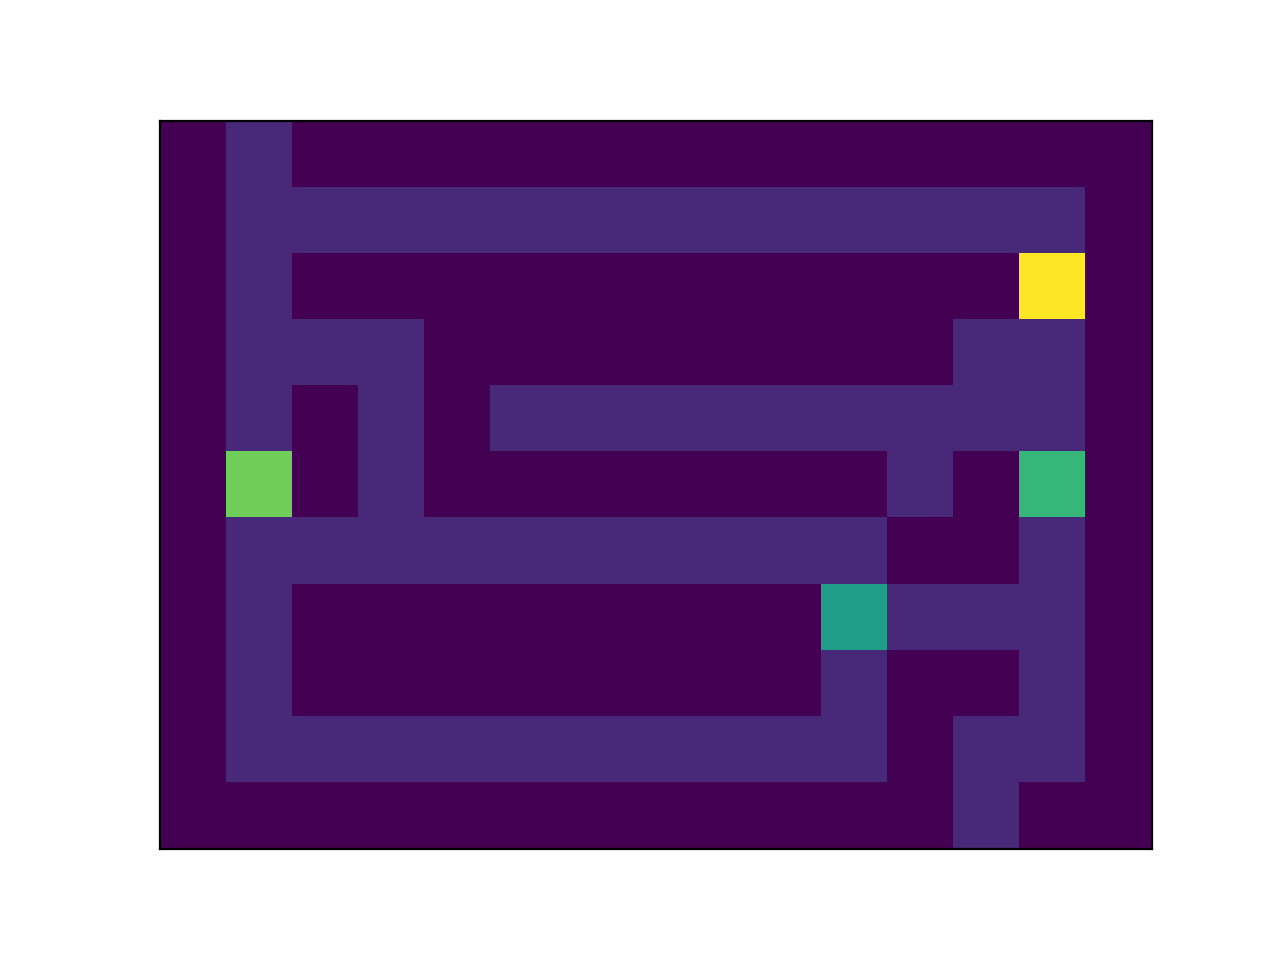

/Users/damian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<IPython.core.display.Javascript object>


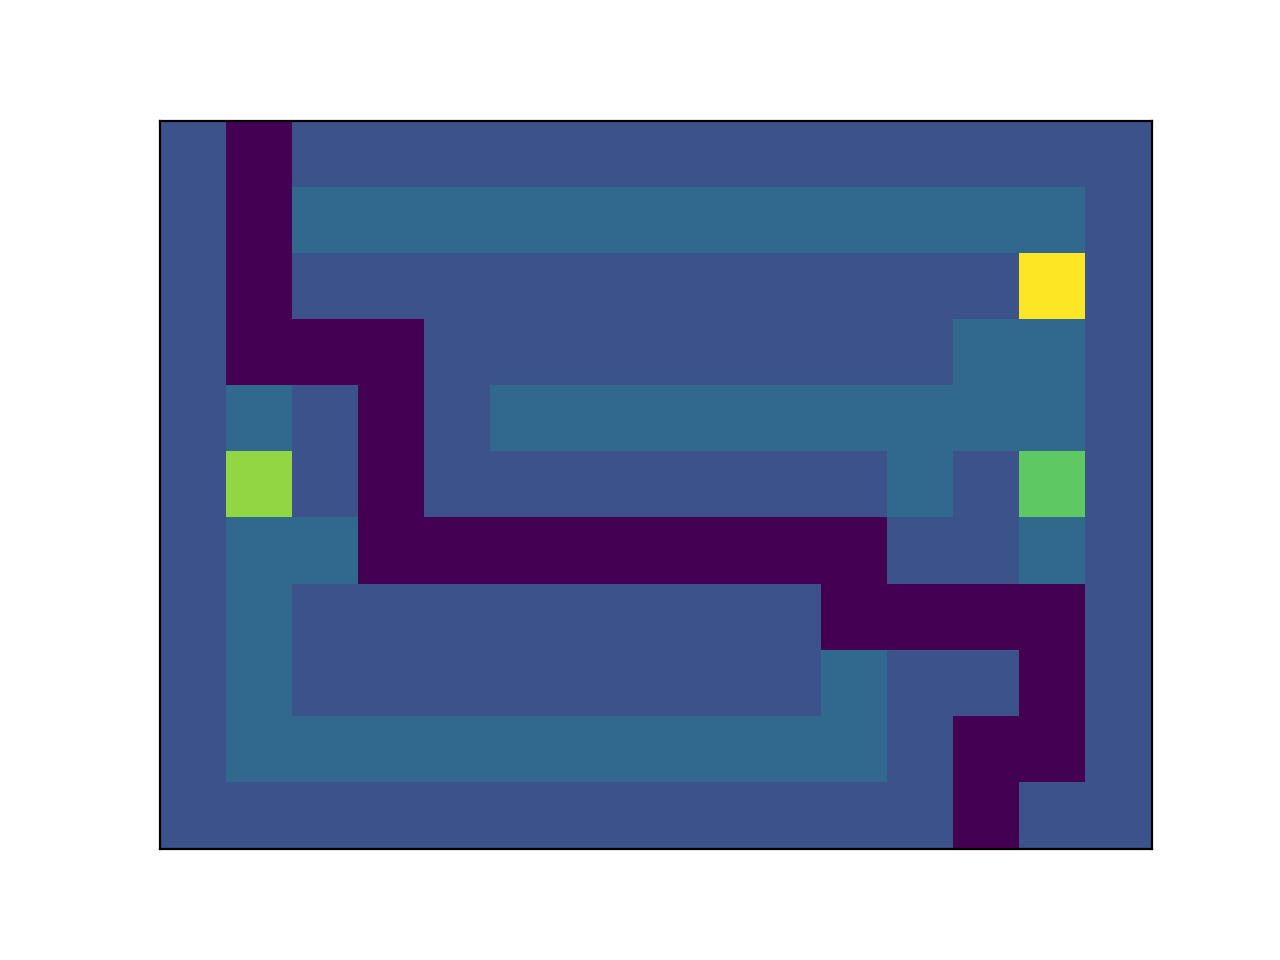

In [6]:
maze = load_maze('map1.txt')
result = get_way(maze)

draw_maze(maze)
draw_maze_solved(maze, result)


<IPython.core.display.Javascript object>


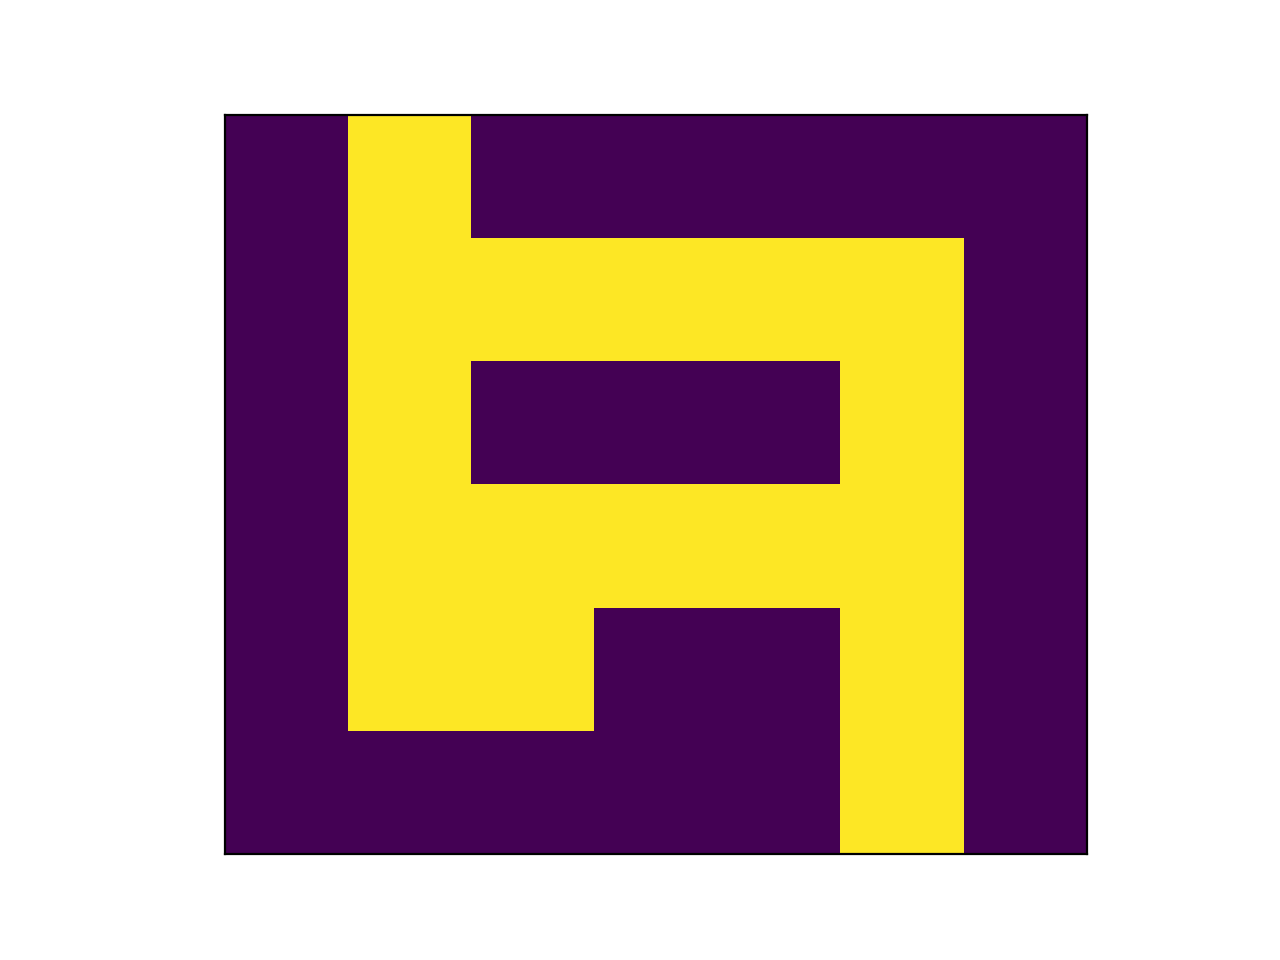

<IPython.core.display.Javascript object>


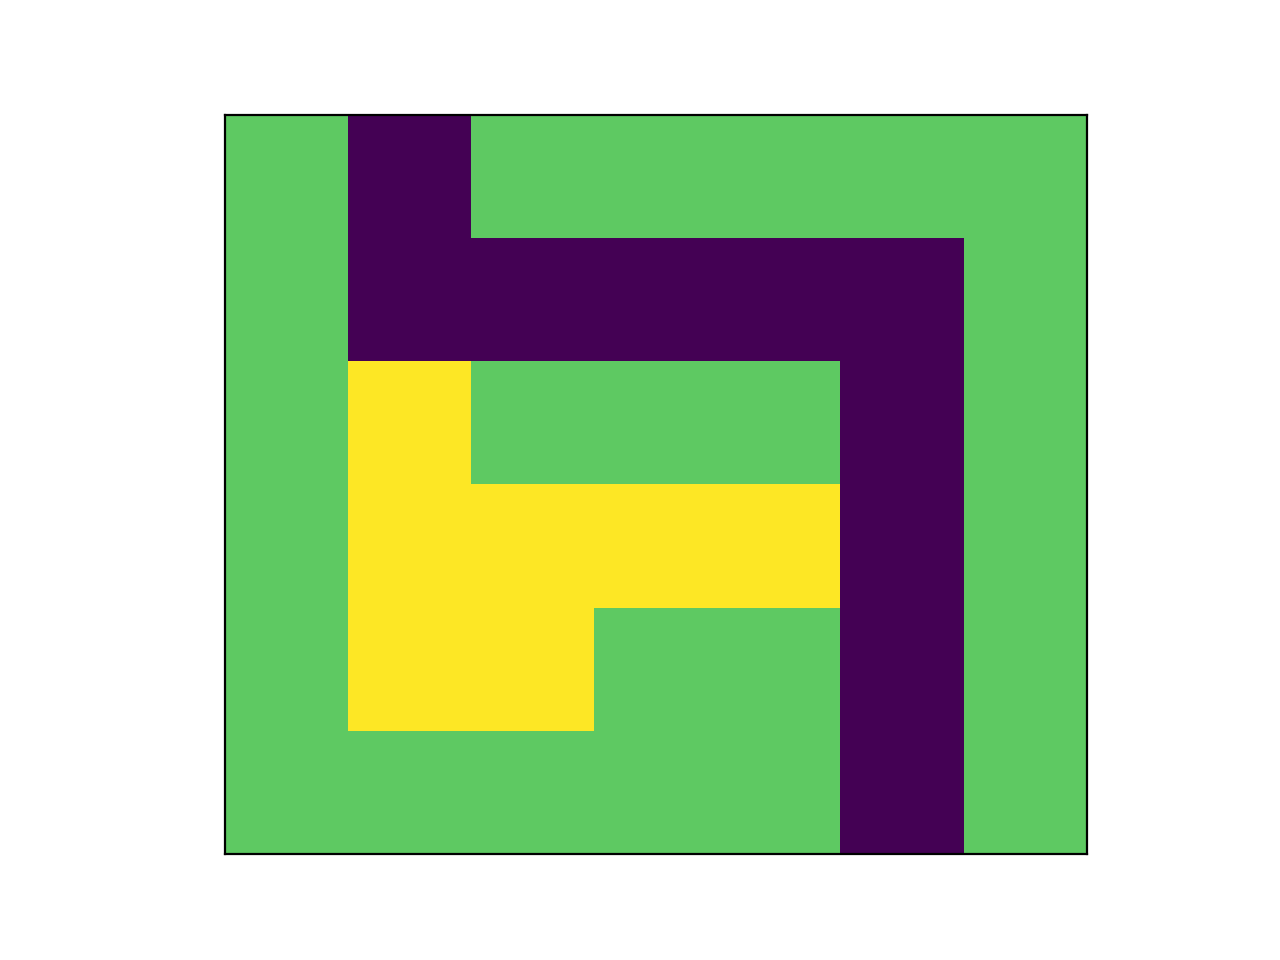

In [7]:
maze2 = load_maze('map2.txt')
result2 = get_way(maze2)

draw_maze(maze2)
draw_maze_solved(maze2, result2)


<IPython.core.display.Javascript object>


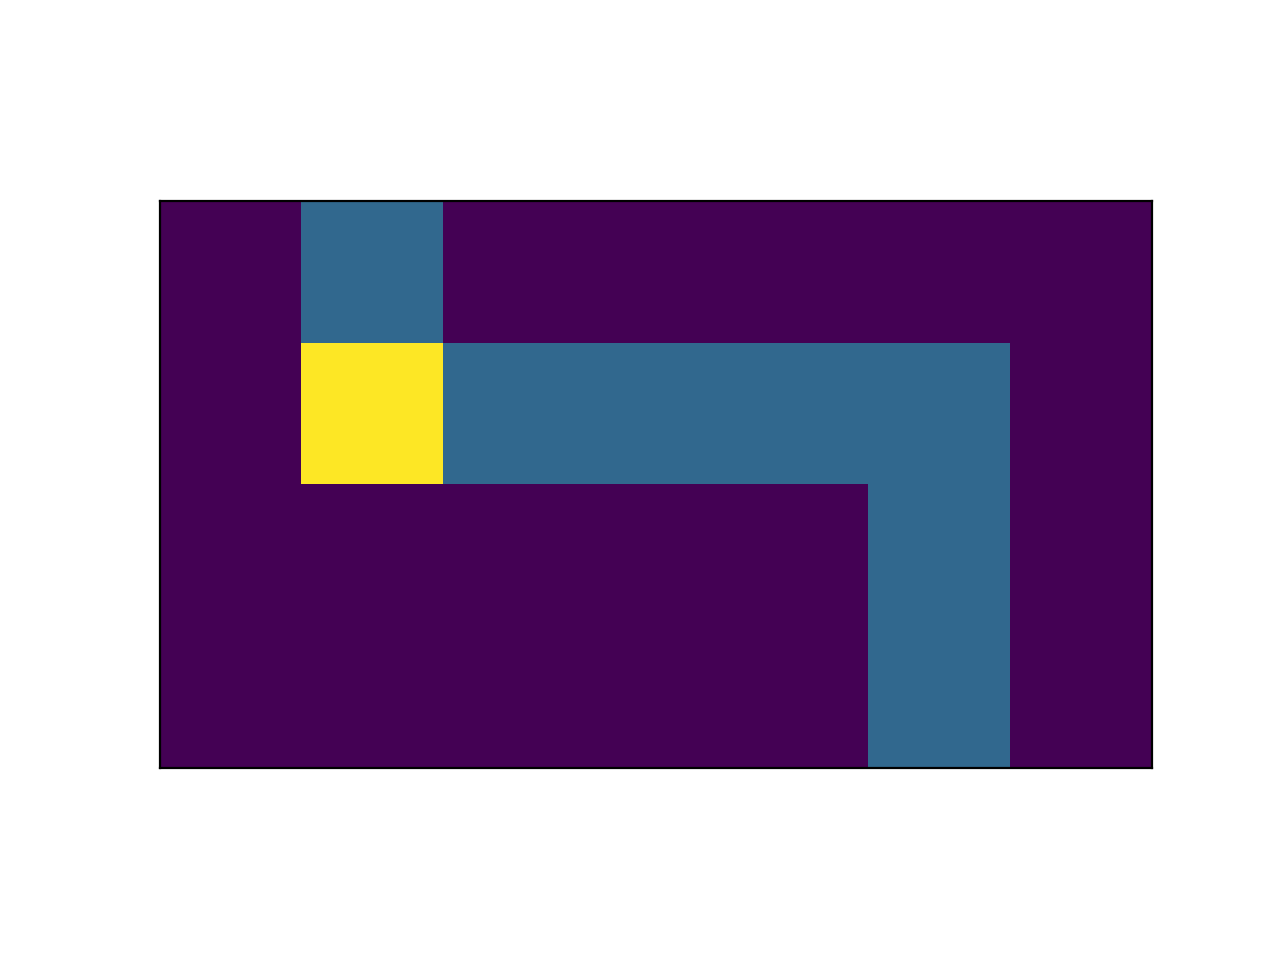

<IPython.core.display.Javascript object>


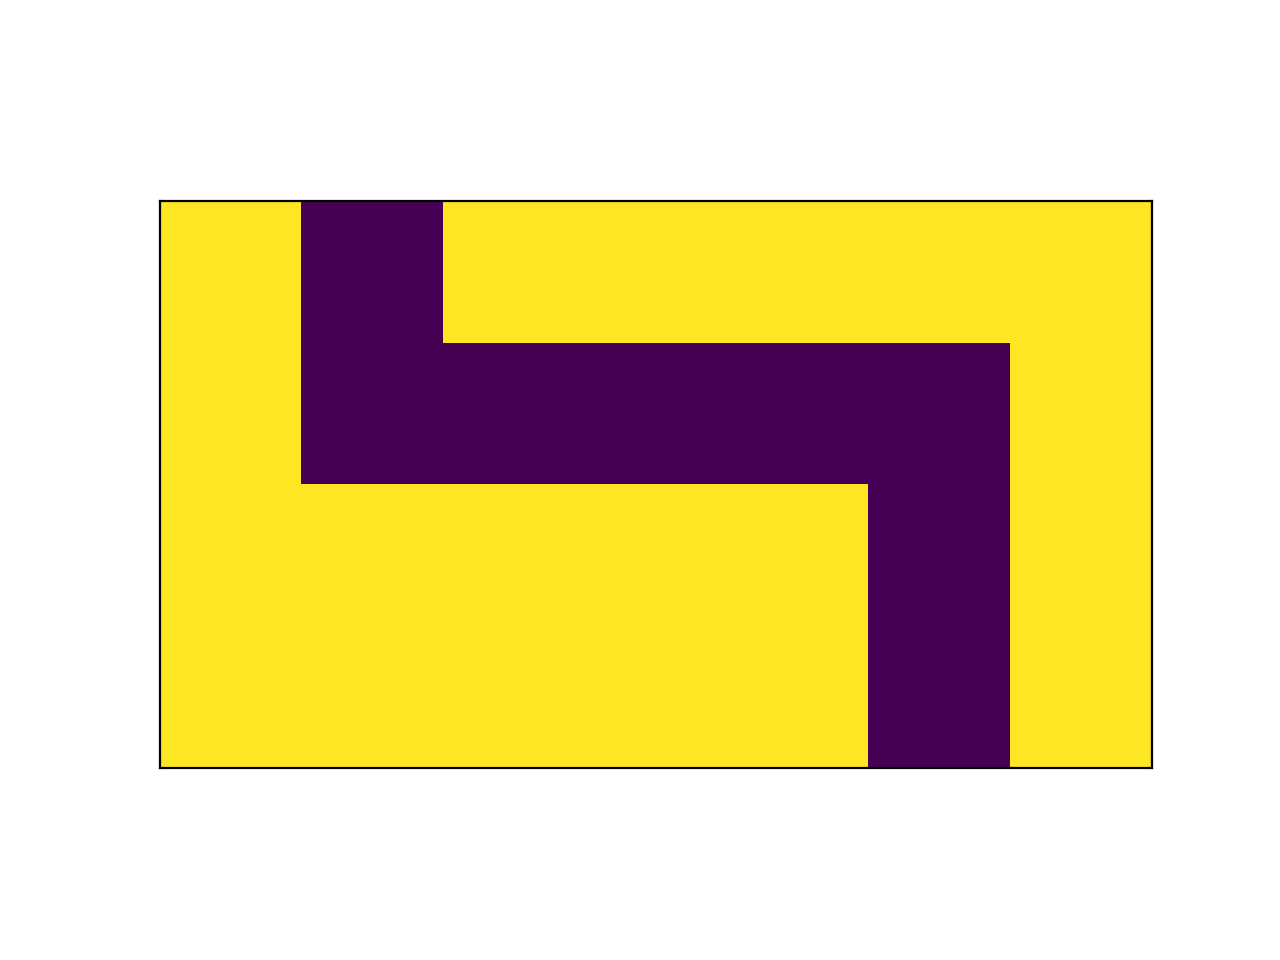

In [8]:
maze3 = load_maze('map3.txt')
result3 = get_way(maze3)

draw_maze(maze3)
draw_maze_solved(maze3, result3)
